# Cheryl Bai Sleep Inference

## Importing Data and Data Cleaning

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pytz

In [135]:
# import chrome search history data from personal account and turn into dataframe
chrome_history_CB_personal = pd.read_json("CB_data/history_personal.json")
chrome_history_CB_personal.head()

,id,isLocal,referringVisitId,transition,visitId,visitTime,title,lastVisitTime,typedCount,url,visitCount
0,16741,True,0,link,46198,1.739468e+12,Export Chrome History - Chrome Web Store,1.739468e+12,0,https://chromewebstore.google.com/detail/expor...,2
1,16741,True,46196,link,46197,1.739468e+12,Export Chrome History - Chrome Web Store,1.739468e+12,0,https://chromewebstore.google.com/detail/expor...,2
2,16737,True,0,link,46193,1.739468e+12,how to export chrome browser history - Google ...,1.739468e+12,0,https://www.google.com/search?q=how+to+export+...,3
3,16737,True,0,link,46192,1.739468e+12,how to export chrome browser history - Google ...,1.739468e+12,0,https://www.google.com/search?q=how+to+export+...,3
4,16737,True,0,generated,46191,1.739468e+12,how to export chrome browser history - Google ...,1.739468e+12,0,https://www.google.com/search?q=how+to+export+...,3


In [136]:
# convert the last visit time to human readable time
chrome_history_CB_personal["visitTime"] = chrome_history_CB_personal["visitTime"] / 1000
chrome_history_CB_personal["visitTime"] = pd.to_datetime(chrome_history_CB_personal["visitTime"], unit="s", utc=True).dt.tz_convert(pytz.timezone('US/Eastern')).dt.tz_localize(None)
chrome_history_CB_personal.head()

,id,isLocal,referringVisitId,transition,visitId,visitTime,title,lastVisitTime,typedCount,url,visitCount
0,16741,True,0,link,46198,2025-02-13 12:35:22.919520000,Export Chrome History - Chrome Web Store,1.739468e+12,0,https://chromewebstore.google.com/detail/expor...,2
1,16741,True,46196,link,46197,2025-02-13 12:35:22.265860096,Export Chrome History - Chrome Web Store,1.739468e+12,0,https://chromewebstore.google.com/detail/expor...,2
2,16737,True,0,link,46193,2025-02-13 12:35:16.480272896,how to export chrome browser history - Google ...,1.739468e+12,0,https://www.google.com/search?q=how+to+export+...,3
3,16737,True,0,link,46192,2025-02-13 12:35:15.968783872,how to export chrome browser history - Google ...,1.739468e+12,0,https://www.google.com/search?q=how+to+export+...,3
4,16737,True,0,generated,46191,2025-02-13 12:35:15.540852992,how to export chrome browser history - Google ...,1.739468e+12,0,https://www.google.com/search?q=how+to+export+...,3


In [137]:
# import chrome search history data from uva account and turn into dataframe
chrome_history_CB_uva = pd.read_csv("CB_data/visits_uva.csv")
chrome_history_CB_uva.head()

,id,url,visit_time,from_visit,transition,segment_id,visit_duration,incremented_omnibox_typed_score,opener_visit,originator_cache_guid,originator_visit_id,originator_from_visit,originator_opener_visit,is_known_to_sync,consider_for_ntp_most_visited,external_referrer_url,visited_link_id,app_id,visit_time_formatted
0,424475,117331,13376199127105962,0,838860805,0,1848975,0,0,NaN,0,0,0,0,1,NaN,0,NaN,2024-11-16 02:52:07
1,424476,117332,13376199128951155,424475,268435456,0,0,0,0,NaN,0,0,0,0,1,NaN,31787,NaN,2024-11-16 02:52:08
2,424477,117333,13376199128951155,424476,-2147483648,0,0,0,0,NaN,0,0,0,0,1,NaN,31788,NaN,2024-11-16 02:52:08
3,424478,117334,13376199128951155,424477,-1610612736,0,9142189,0,0,NaN,0,0,0,0,1,NaN,31789,NaN,2024-11-16 02:52:08
4,424479,110130,13376199138091016,424478,805306368,0,3148338,0,0,NaN,0,0,0,0,1,NaN,31790,NaN,2024-11-16 02:52:18


In [138]:
# get urls from chrome search history data and merge into dataframe
urls_CB_uva = pd.read_csv("CB_data/urls_uva.csv")
chrome_history_CB_uva = pd.merge(chrome_history_CB_uva, urls_CB_uva, left_on="url", right_on="id", how="inner")
chrome_history_CB_uva.head()

,id_x,url_x,visit_time,from_visit,transition,segment_id,visit_duration,incremented_omnibox_typed_score,opener_visit,originator_cache_guid,...,visited_link_id,app_id,visit_time_formatted,id_y,url_y,title,visit_count,typed_count,last_visit_time,hidden
0,424475,117331,13376199127105962,0,838860805,0,1848975,0,0,NaN,...,0,NaN,2024-11-16 02:52:07,117331,https://www.google.com/search?q=lululemon+like...,lululemon like new - Google Search,1,0,13376199127105962,0
1,424476,117332,13376199128951155,424475,268435456,0,0,0,0,NaN,...,31787,NaN,2024-11-16 02:52:08,117332,https://www.google.com/aclk?sa=l&ai=DChcSEwilr...,lululemon Like New | Gently used gear for resale,1,0,13376199128951155,0
2,424477,117333,13376199128951155,424476,-2147483648,0,0,0,0,NaN,...,31788,NaN,2024-11-16 02:52:08,117333,https://www.googleadservices.com/pagead/aclk?s...,lululemon Like New | Gently used gear for resale,1,0,13376199128951155,0
3,424478,117334,13376199128951155,424477,-1610612736,0,9142189,0,0,NaN,...,31789,NaN,2024-11-16 02:52:08,117334,https://likenew.lululemon.com/?CID=Google_PPC_...,lululemon Like New | Gently used gear for resale,1,0,13376199128951155,0
4,424479,110130,13376199138091016,424478,805306368,0,3148338,0,0,NaN,...,31790,NaN,2024-11-16 02:52:18,110130,https://likenew.lululemon.com/search?q=define,"Search: 2 for ""define""",5,0,13381990561287716,0


In [6]:
# THIS CODE IS NO LONGER NEEDED BECAUSE OF USING THE VISITS TABLE WHICH ALREADY HAS THE VISIT TIME FORMATTED

# convert the last visit time to human readable time
# this data was saved in webkit/chrome format which is different from how the other chrome profile exported timestamps
# def date_from_webkit(webkit_timestamp):
#     epoch_start = datetime(1601,1,1)
#     delta = timedelta(microseconds=int(webkit_timestamp))
#     return epoch_start + delta

# chrome_history_CB_uva["visit_time"] = chrome_history_CB_uva["visit_time"].apply(date_from_webkit)
# chrome_history_CB_uva.head()

In [139]:
# select relevant columns and combine the dataframes
chrome_history_CB_personal = chrome_history_CB_personal[["url", "visitCount", "typedCount", "title", "visitTime"]]
chrome_history_CB_uva = chrome_history_CB_uva[["url_y", "visit_count", "typed_count", "title", "visit_time_formatted"]]
chrome_history_CB_personal = chrome_history_CB_personal.rename(columns={"typedCount" : "typed_count", "visitCount": "visit_count", "visitTime": "visit_time"})
chrome_history_CB_uva = chrome_history_CB_uva.rename(columns={"url_y" : "url", "visit_time_formatted": "visit_time"})
chrome_history_CB = pd.concat([chrome_history_CB_uva, chrome_history_CB_personal])

# split date and time
chrome_history_CB["visit_time"] = pd.to_datetime(chrome_history_CB["visit_time"])

# Extract date and time into separate columns
chrome_history_CB["visit_date"] = chrome_history_CB["visit_time"].dt.date
chrome_history_CB["visit_time"] = chrome_history_CB["visit_time"].dt.strftime("%H:%M:%S")

print("Number of entries: ", len(chrome_history_CB))
chrome_history_CB.head()

Number of entries:  32733


,url,visit_count,typed_count,title,visit_time,visit_date
0,https://www.google.com/search?q=lululemon+like...,1,0,lululemon like new - Google Search,02:52:07,2024-11-16
1,https://www.google.com/aclk?sa=l&ai=DChcSEwilr...,1,0,lululemon Like New | Gently used gear for resale,02:52:08,2024-11-16
2,https://www.googleadservices.com/pagead/aclk?s...,1,0,lululemon Like New | Gently used gear for resale,02:52:08,2024-11-16
3,https://likenew.lululemon.com/?CID=Google_PPC_...,1,0,lululemon Like New | Gently used gear for resale,02:52:08,2024-11-16
4,https://likenew.lululemon.com/search?q=define,5,0,"Search: 2 for ""define""",02:52:18,2024-11-16


In [140]:
# sort chrome history visits by date and time
def sort_by_date_time(df):
    # Sort DataFrame by visit_date and visit_time
    df_sorted = df.sort_values(by=["visit_date", "visit_time"]).reset_index(drop=True)

    return df_sorted

chrome_history_CB = sort_by_date_time(chrome_history_CB)
chrome_history_CB.tail(100)

,url,visit_count,typed_count,title,visit_time,visit_date
32633,https://shibidp.its.virginia.edu/idp/profile/S...,191,0,NetBadge Message - Saving Session Information...,23:55:29,2025-02-13
32634,https://shibidp.its.virginia.edu/idp/profile/S...,191,0,NetBadge Message - Saving Session Information...,23:55:29,2025-02-13
32635,https://www.google.com/a/virginia.edu/acs,9,0,Redirecting...,23:55:29,2025-02-13
32636,https://accounts.google.com/a/virginia.edu/acs,9,0,Redirecting...,23:55:29,2025-02-13
32637,https://accounts.google.com/signin/continue?sa...,1,0,NaN,23:55:29,2025-02-13
...,...,...,...,...,...,...
32728,https://www.google.com/search?q=DB+Browser+for...,3,0,DB Browser for SQLite - Google Search,00:21:43,2025-02-14
32729,https://www.google.com/search?q=DB+Browser+for...,3,0,DB Browser for SQLite - Google Search,00:21:43,2025-02-14
32730,https://www.google.com/search?q=DB+Browser+for...,3,0,DB Browser for SQLite - Google Search,00:21:44,2025-02-14
32731,https://sqlitebrowser.org/,1,0,DB Browser for SQLite,00:21:44,2025-02-14


In [141]:
chrome_history_CB["visit_time"] = pd.to_datetime(chrome_history_CB["visit_time"])
print(chrome_history_CB.dtypes)
chrome_history_CB.tail(100)

C:\Users\janic\AppData\Local\Temp\ipykernel_57540\4137874571.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chrome_history_CB["visit_time"] = pd.to_datetime(chrome_history_CB["visit_time"])


url                    object
visit_count             int64
typed_count             int64
title                  object
visit_time     datetime64[ns]
visit_date             object
dtype: object


,url,visit_count,typed_count,title,visit_time,visit_date
32633,https://shibidp.its.virginia.edu/idp/profile/S...,191,0,NetBadge Message - Saving Session Information...,2025-02-23 23:55:29,2025-02-13
32634,https://shibidp.its.virginia.edu/idp/profile/S...,191,0,NetBadge Message - Saving Session Information...,2025-02-23 23:55:29,2025-02-13
32635,https://www.google.com/a/virginia.edu/acs,9,0,Redirecting...,2025-02-23 23:55:29,2025-02-13
32636,https://accounts.google.com/a/virginia.edu/acs,9,0,Redirecting...,2025-02-23 23:55:29,2025-02-13
32637,https://accounts.google.com/signin/continue?sa...,1,0,NaN,2025-02-23 23:55:29,2025-02-13
...,...,...,...,...,...,...
32728,https://www.google.com/search?q=DB+Browser+for...,3,0,DB Browser for SQLite - Google Search,2025-02-23 00:21:43,2025-02-14
32729,https://www.google.com/search?q=DB+Browser+for...,3,0,DB Browser for SQLite - Google Search,2025-02-23 00:21:43,2025-02-14
32730,https://www.google.com/search?q=DB+Browser+for...,3,0,DB Browser for SQLite - Google Search,2025-02-23 00:21:44,2025-02-14
32731,https://sqlitebrowser.org/,1,0,DB Browser for SQLite,2025-02-23 00:21:44,2025-02-14


In [58]:
# view apple watch sleep data as a dataframe
sleep_CB = pd.read_csv("cheryl_sleep_data.csv")
sleep_CB["Date"] = pd.to_datetime(sleep_CB["Date"])
sleep_CB.tail()

,Unnamed: 0,Date,total_sleep_hours,sleep_start,sleep_end
778,778,2025-02-13,8.241667,2025-02-13 01:18:33-05:00,2025-02-13 09:33:33-05:00
779,779,2025-02-14,5.233333,2025-02-14 00:58:44-05:00,2025-02-14 06:25:14-05:00
780,780,2025-02-15,7.575000,2025-02-14 23:41:46-05:00,2025-02-15 17:14:49-05:00
781,781,2025-02-16,8.016667,2025-02-15 23:03:10-05:00,2025-02-16 14:40:19-05:00
782,782,2025-02-17,7.350000,2025-02-17 01:12:58-05:00,2025-02-17 08:39:28-05:00


## Sleep Inference

In [142]:
# get the first and last visited websites per date

def get_first_and_last_visits(df):
    # find first and last visited websites per date
    first_visits = df.loc[df.groupby("visit_date")["visit_time"].idxmin()]
    last_visits = df.loc[df.groupby("visit_date")["visit_time"].idxmax()]

    # select relevant columns
    first_visits = first_visits[["visit_date", "visit_time", "url", "title"]].rename(columns={
        "visit_time": "visit_time_first",
        "url": "url_first",
        "title": "title_first"
    })
    
    last_visits = last_visits[["visit_date", "visit_time", "url", "title"]].rename(columns={
        "visit_time": "visit_time_last",
        "url": "url_last",
        "title": "title_last"
    })

    # merge both DataFrames on visit_date to get one row per date
    visit_summary = pd.merge(first_visits, last_visits, on="visit_date")
    return visit_summary

visit_summary_df = get_first_and_last_visits(chrome_history_CB)
visit_summary_df.tail()

,visit_date,visit_time_first,url_first,title_first,visit_time_last,url_last,title_last
71,2025-02-10,2025-02-23 03:23:32,https://docs.google.com/presentation/?usp=slid...,Google Slides,2025-02-23 23:55:24,https://www.netflix.com/watch/81773841?trackId...,Netflix
72,2025-02-11,2025-02-23 02:53:29,https://docs.google.com/spreadsheets/u/1/d/e/2...,CS4774 ML Schedule - Google Drive,2025-02-23 23:49:30,https://chatgpt.com/c/67abe207-6820-800b-99fc-...,Logarithmic Expression Simplification
73,2025-02-12,2025-02-23 01:36:19,https://www.google.com/search?q=gmail&rlz=1C1O...,gmail - Google Search,2025-02-23 23:53:21,https://www.youtube.com/watch?v=6v_R180kIGs,HALF HORSE HALF MAN | OFFICIAL VIDEO - YouTube
74,2025-02-13,2025-02-23 00:49:50,https://www.google.com/search?q=problems+you+c...,problems you can solve in prolog - Google Search,2025-02-23 23:57:44,https://support.google.com/accounts/answer/302...,How to download your Google data - Google Acco...
75,2025-02-14,2025-02-23 00:13:53,https://www.google.com/search?q=hrome%3A%2F%2F...,chrome://settings/syncSetup - Google Search,2025-02-23 00:21:53,https://sqlitebrowser.org/dl/,Downloads - DB Browser for SQLite


In [143]:
print(visit_summary_df["visit_time_first"].dtype)
visit_summary_df["visit_time_last"] = pd.to_datetime(visit_summary_df["visit_time_last"])

datetime64[ns]


In [69]:
# tally up keywords
keywords = ["uva", "canvas", "eqk9vb", "drive"]

tally_data = []
last_time_per_date = {}

for _, row in chrome_history_CB.iterrows():
    row_tally = {"visit_date": row["visit_date"], "total_count": 0}
    
    # Count occurrences of each keyword
    for keyword in keywords:
        count = sum(row.astype(str).str.contains(keyword, case=False, na=False))
        row_tally[keyword] = count
        row_tally["total_count"] += count

    if row["visit_date"] not in last_time_per_date:
        last_time_per_date[row["visit_date"]] = row["visit_time"]
    else:
        if row["visit_time"] > last_time_per_date[row["visit_date"]]:
            last_time_per_date[row["visit_date"]] = row["visit_time"]
    
    tally_data.append(row_tally)

tally_df = pd.DataFrame(tally_data)
summary_df = tally_df.groupby("visit_date", as_index=False).sum()
summary_df["last_time"] = summary_df["visit_date"].map(last_time_per_date)

In [70]:
# double check to see if any dates are missing, if so, add them to my df
summary_df["visit_date"] = pd.to_datetime(summary_df["visit_date"])

full_date_range = pd.date_range(start=summary_df["visit_date"].min(), end=summary_df["visit_date"].max(), freq="D")
missing_dates = full_date_range[~full_date_range.isin(summary_df["visit_date"])]

missing_rows = []
for missing_date in missing_dates:
    missing_row = {"visit_date": missing_date, "total_count": 0, "uva": 0, "canvas": 0, "eqk9vb": 0, "drive": 0}
    missing_rows.append(missing_row)
missing_df = pd.DataFrame(missing_rows)

summary_df = pd.concat([summary_df, missing_df], ignore_index=True)
summary_df = summary_df.sort_values("visit_date").reset_index(drop=True)

summary_df.head()

,visit_date,total_count,uva,canvas,eqk9vb,drive,last_time
0,2024-11-16,0,0,0,0,0,2025-02-23 06:24:21
1,2024-11-17,113,63,26,6,18,2025-02-23 23:18:40
2,2024-11-18,229,58,87,24,60,2025-02-23 23:13:00
3,2024-11-19,126,57,40,6,23,2025-02-23 23:44:47
4,2024-11-20,234,49,110,30,45,2025-02-23 23:06:47


datetime64[ns]
46


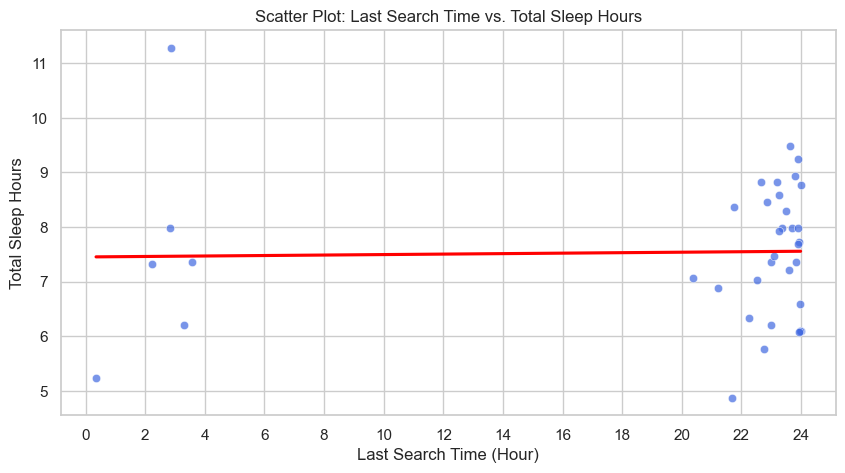

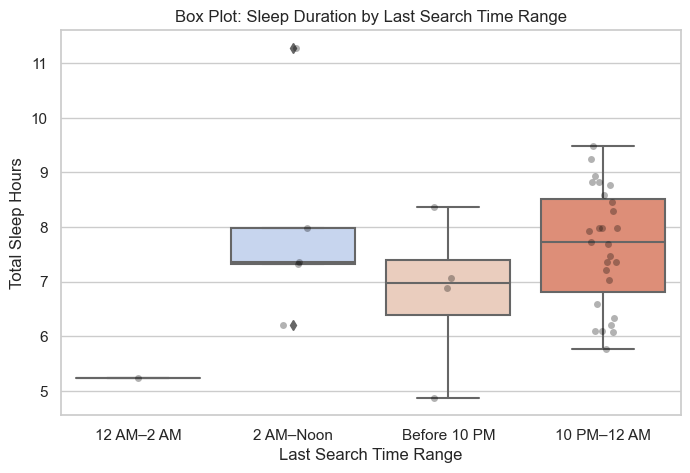

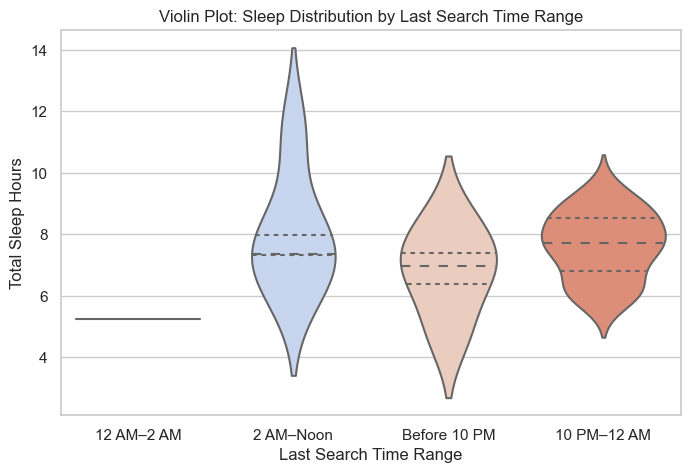

In [144]:
sns.set_theme(style="whitegrid")

# Convert datetime columns
sleep_CB["Date"] = pd.to_datetime(sleep_CB["Date"])  # Sleep recorded by morning of the date
# visit_summary_df["date"] = pd.to_datetime(visit_summary_df["date"])

print(visit_summary_df["visit_time_first"].dtype)
visit_summary_df["visit_date"] = pd.to_datetime(visit_summary_df["visit_date"])


visit_summary_df["Sleep Date"] = visit_summary_df["visit_date"].where(
    visit_summary_df["visit_time_last"].dt.hour < 4,  # Check if search time is before 4 AM
    visit_summary_df["visit_date"] - pd.Timedelta(days=1)  # Subtract one day if it's after 4 AM
)

# Merge sleep and search data
merged_df = sleep_CB.merge(visit_summary_df, left_on="Date", right_on="Sleep Date", how="left")

# Convert last search time into a numeric hour for plotting
merged_df["search_hour"] = pd.to_datetime(merged_df["visit_time_last"], format="%H:%M:%S").dt.hour + \
                            pd.to_datetime(merged_df["visit_time_last"], format="%H:%M:%S").dt.minute / 60


merged_df["Date"] = pd.to_datetime(merged_df["Date"])

start_date = "2025-01-01"
end_date = "2025-02-17"

merged_df = merged_df[(merged_df["Date"] >= start_date) & (merged_df["Date"] <= end_date)]

print(len(merged_df))

plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_df, x="search_hour", y="total_sleep_hours", alpha=0.7, color="royalblue")
sns.regplot(data=merged_df, x="search_hour", y="total_sleep_hours", scatter=False, color="red", ci=None)  # Trendline
plt.xlabel("Last Search Time (Hour)")
plt.ylabel("Total Sleep Hours")
plt.title("Scatter Plot: Last Search Time vs. Total Sleep Hours")
plt.xticks(range(0, 25, 2))  # Show time as hours
plt.show()

merged_df["search_range"] = pd.cut(
    merged_df["search_hour"],
    bins=[0, 2, 12, 22, 24],  # Before 10 PM, 10 PM–12 AM, 12 AM–2 AM, 2 AM–Noon
    labels=["12 AM–2 AM", "2 AM–Noon", "Before 10 PM", "10 PM–12 AM"],
    ordered=True
)

plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x="search_range", y="total_sleep_hours", palette="coolwarm")
sns.stripplot(data=merged_df, x="search_range", y="total_sleep_hours", color="black", alpha=0.3, jitter=True)  # Add individual points
plt.xlabel("Last Search Time Range")
plt.ylabel("Total Sleep Hours")
plt.title("Box Plot: Sleep Duration by Last Search Time Range")
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(data=merged_df, x="search_range", y="total_sleep_hours", palette="coolwarm", inner="quartile")
plt.xlabel("Last Search Time Range")
plt.ylabel("Total Sleep Hours")
plt.title("Violin Plot: Sleep Distribution by Last Search Time Range")
plt.show()


In [127]:
print(summary_df.dtypes)
print(len(summary_df))

visit_date     datetime64[ns]
total_count             int64
uva                     int64
canvas                  int64
eqk9vb                  int64
drive                   int64
last_time      datetime64[ns]
dtype: object
91


In [129]:
uva_merged_df = sleep_CB.merge(summary_df, left_on="Date", right_on="visit_date", how="left")
uva_merged_df.tail()

,Unnamed: 0,Date,total_sleep_hours,sleep_start,sleep_end,visit_date,total_count,uva,canvas,eqk9vb,drive,last_time
778,778,2025-02-13,8.241667,2025-02-13 01:18:33-05:00,2025-02-13 09:33:33-05:00,2025-02-13,77.0,27.0,31.0,19.0,0.0,2025-02-23 23:57:44
779,779,2025-02-14,5.233333,2025-02-14 00:58:44-05:00,2025-02-14 06:25:14-05:00,2025-02-14,20.0,2.0,0.0,0.0,18.0,2025-02-23 00:21:53
780,780,2025-02-15,7.575000,2025-02-14 23:41:46-05:00,2025-02-15 17:14:49-05:00,NaT,NaN,NaN,NaN,NaN,NaN,NaT
781,781,2025-02-16,8.016667,2025-02-15 23:03:10-05:00,2025-02-16 14:40:19-05:00,NaT,NaN,NaN,NaN,NaN,NaN,NaT
782,782,2025-02-17,7.350000,2025-02-17 01:12:58-05:00,2025-02-17 08:39:28-05:00,NaT,NaN,NaN,NaN,NaN,NaN,NaT


In [145]:
uva_merged_df["Date"] = pd.to_datetime(uva_merged_df["Date"])

start_date = "2025-01-01"
end_date = "2025-02-17"

uva_merged_df = uva_merged_df[(uva_merged_df["Date"] >= start_date) & (uva_merged_df["Date"] <= end_date)]

print(len(uva_merged_df))

43


Equation of trendline: y = -0.00073x + 7.59
R-squared: 0.005


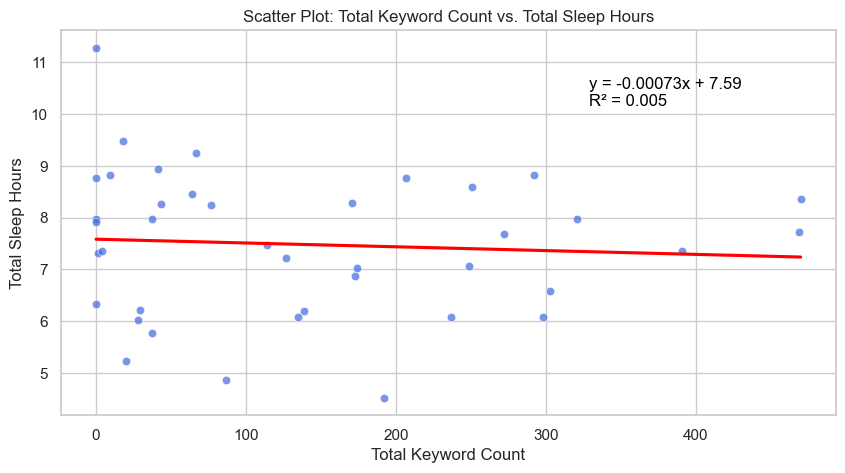

In [146]:
from scipy.stats import linregress

# Drop NaN values to avoid errors in regression calculation
filtered_df = uva_merged_df.dropna(subset=["total_count", "total_sleep_hours"])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_df["total_count"], filtered_df["total_sleep_hours"])

# Print equation
print(f"Equation of trendline: y = {slope:.5f}x + {intercept:.2f}")
print(f"R-squared: {r_value**2:.3f}")  # R-squared value (goodness of fit)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=filtered_df, x="total_count", y="total_sleep_hours", alpha=0.7, color="royalblue")
sns.regplot(data=filtered_df, x="total_count", y="total_sleep_hours", scatter=False, color="red", ci=None)

# Add equation text to plot
equation_text = f"y = {slope:.5f}x + {intercept:.2f}\nR² = {r_value**2:.3f}"
plt.text(x=filtered_df["total_count"].max() * 0.7, 
         y=filtered_df["total_sleep_hours"].max() * 0.9, 
         s=equation_text, fontsize=12, color="black")

plt.xlabel("Total Keyword Count")
plt.ylabel("Total Sleep Hours")
plt.title("Scatter Plot: Total Keyword Count vs. Total Sleep Hours")
plt.show()


## Youtube Inference

In [160]:
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

# Load the HTML file (adjust the file name/path as needed)
with open("CB_data/watch-history.html", "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "html.parser")

# Inspect your HTML file to identify the right tags/classes.
# Here, we assume each history entry is within a div with class 'content-cell'
entries = soup.find_all("div", class_="content-cell")

data = []
for entry in entries:
    # Extract the title (YouTube video link text)
    title_tag = entry.find("a")
    title = title_tag.get_text(strip=True) if title_tag else None

    # Extract the URL (optional)
    url = title_tag["href"] if title_tag and "href" in title_tag.attrs else None

    # Extract the date/time
    time_str = entry.text.strip().split("\n")[-1]  # Extract last line, usually the date
    time_str = time_str.strip() if time_str else None

    # Try to parse the date (modify format if needed)
    date_time = None
    if time_str:
        try:
            date_time = datetime.strptime(time_str, "%B %d, %Y, %I:%M:%S %p EST")
        except ValueError:
            date_time = time_str  # Keep original string if parsing fails

    # Only append if there's a valid title (to avoid extra records)
    if title:
        data.append({"title": title, "url": url, "date_time": date_time})

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
df.head()

,title,url,date_time
0,HALF HORSE HALF MAN | OFFICIAL VIDEO,https://www.youtube.com/watch?v=6v_R180kIGs,Watched HALF HORSE HALF MAN | OFFICIAL VIDEOOC...
1,here,https://myaccount.google.com/activitycontrols,Products: YouTubeWhy is this here? This activi...
2,Bluehost's ✨NEW✨ AI Website Builder,https://www.youtube.com/watch?v=u3UEiKiBlgE,Watched Bluehost's ✨NEW✨ AI Website BuilderFeb...
3,here,https://myaccount.google.com/activitycontrols,Products: YouTubeDetails: From Google AdsWhy i...
4,"[Solo-Leveling]SymphonicSuite-Lv.1 → Lv.2"" Mus...",https://www.youtube.com/watch?v=lmajFEi1Hdk,Watched [Solo-Leveling]SymphonicSuite-Lv.1 → L...


In [161]:
import re
from dateutil import parser

def parse_date_time(text):
    pattern = r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+\d{1,2},\s+\d{4},\s+\d{1,2}:\d{2}:\d{2}\s+[AP]M(?:\s+[A-Z]+)?'
    match = re.search(pattern, text)
    if match:
        date_str = match.group(0)
        # print("Extracted date string:", date_str)
        dt = parser.parse(date_str)
        return dt
    else:
        # print("No match found in:", text)
        return None

df["date_time"] = df["date_time"].apply(parse_date_time)
df.head()


c:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,title,url,date_time
0,HALF HORSE HALF MAN | OFFICIAL VIDEO,https://www.youtube.com/watch?v=6v_R180kIGs,2025-02-12 23:53:21
1,here,https://myaccount.google.com/activitycontrols,NaT
2,Bluehost's ✨NEW✨ AI Website Builder,https://www.youtube.com/watch?v=u3UEiKiBlgE,2025-02-12 23:53:09
3,here,https://myaccount.google.com/activitycontrols,NaT
4,"[Solo-Leveling]SymphonicSuite-Lv.1 → Lv.2"" Mus...",https://www.youtube.com/watch?v=lmajFEi1Hdk,2025-02-10 20:54:30


In [162]:
# remove rows without a date_time
df = df.dropna(subset=["date_time"])
df.head()

,title,url,date_time
0,HALF HORSE HALF MAN | OFFICIAL VIDEO,https://www.youtube.com/watch?v=6v_R180kIGs,2025-02-12 23:53:21
2,Bluehost's ✨NEW✨ AI Website Builder,https://www.youtube.com/watch?v=u3UEiKiBlgE,2025-02-12 23:53:09
4,"[Solo-Leveling]SymphonicSuite-Lv.1 → Lv.2"" Mus...",https://www.youtube.com/watch?v=lmajFEi1Hdk,2025-02-10 20:54:30
6,【MV】『SHADOWBORN』 Hiroyuki SAWANO feat. Benjami...,https://www.youtube.com/watch?v=qUFRPDHs1Q8,2025-02-10 20:51:10
9,DCD-The-2530,https://www.youtube.com/watch?v=dO1MRlcmj60,2025-02-10 20:43:41


In [163]:
# separate date and time and reformat
df["date"] = df["date_time"].dt.date
df["time"] = df["date_time"].dt.strftime("%H:%M:%S")
df.drop("date_time", axis=1, inplace=True)
df["type"] = "watch"
df.head()

,title,url,date,time,type
0,HALF HORSE HALF MAN | OFFICIAL VIDEO,https://www.youtube.com/watch?v=6v_R180kIGs,2025-02-12,23:53:21,watch
2,Bluehost's ✨NEW✨ AI Website Builder,https://www.youtube.com/watch?v=u3UEiKiBlgE,2025-02-12,23:53:09,watch
4,"[Solo-Leveling]SymphonicSuite-Lv.1 → Lv.2"" Mus...",https://www.youtube.com/watch?v=lmajFEi1Hdk,2025-02-10,20:54:30,watch
6,【MV】『SHADOWBORN』 Hiroyuki SAWANO feat. Benjami...,https://www.youtube.com/watch?v=qUFRPDHs1Q8,2025-02-10,20:51:10,watch
9,DCD-The-2530,https://www.youtube.com/watch?v=dO1MRlcmj60,2025-02-10,20:43:41,watch


In [164]:
# Load the HTML file (adjust the file name/path as needed)
with open("CB_data/search-history.html", "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "html.parser")

# Inspect your HTML file to identify the right tags/classes.
# Here, we assume each history entry is within a div with class 'content-cell'
entries = soup.find_all("div", class_="content-cell")

data = []
for entry in entries:
    # Extract the title (YouTube video link text)
    title_tag = entry.find("a")
    title = title_tag.get_text(strip=True) if title_tag else None

    # Extract the URL (optional)
    url = title_tag["href"] if title_tag and "href" in title_tag.attrs else None

    # Extract the date/time
    time_str = entry.text.strip().split("\n")[-1]  # Extract last line, usually the date
    time_str = time_str.strip() if time_str else None

    # Try to parse the date (modify format if needed)
    date_time = None
    if time_str:
        try:
            date_time = datetime.strptime(time_str, "%B %d, %Y, %I:%M:%S %p UTC")
        except ValueError:
            date_time = time_str  # Keep original string if parsing fails

    # Only append if there's a valid title (to avoid extra records)
    if title:
        data.append({"title": title, "url": url, "date_time": date_time})

# Convert to DataFrame
df_search = pd.DataFrame(data)

# Display the first few rows
df_search.head()

,title,url,date_time
0,half horse half man song,https://www.youtube.com/results?search_query=h...,"Searched for half horse half man songFeb 12, 2..."
1,here,https://myaccount.google.com/activitycontrols,Products: YouTubeWhy is this here? This activi...
2,Gymshark - Lift Seamless USP,https://www.youtube.com/watch?v=yJuD5y55kZ0,Watched Gymshark - Lift Seamless USPWatched at...
3,here,https://myaccount.google.com/activitycontrols,Products: YouTubeDetails: From Google AdsWhy i...
4,lululemon | FAWI Seasonal 2024 | 15s | YOGAwCO...,https://www.youtube.com/watch?v=kpb97e0nYmY,Watched lululemon | FAWI Seasonal 2024 | 15s |...


In [165]:
# # parse for word searched
df_search.loc[df_search["date_time"].str.contains(r"\bsearched\b", case=False, na=False), "type"] = "search"
df_search["date_time"] = df_search["date_time"].apply(parse_date_time)
df_search.head(10)

c:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,title,url,date_time,type
0,half horse half man song,https://www.youtube.com/results?search_query=h...,2025-02-12 23:53:16,search
1,here,https://myaccount.google.com/activitycontrols,NaT,NaN
2,Gymshark - Lift Seamless USP,https://www.youtube.com/watch?v=yJuD5y55kZ0,2025-02-10 20:43:09,NaN
3,here,https://myaccount.google.com/activitycontrols,NaT,NaN
4,lululemon | FAWI Seasonal 2024 | 15s | YOGAwCO...,https://www.youtube.com/watch?v=kpb97e0nYmY,2025-02-10 20:38:02,NaN
5,here,https://myaccount.google.com/activitycontrols,NaT,NaN
6,(2/18) Now Taxes is Free in the App - TurboTa...,https://www.youtube.com/watch?v=Ua9ffbSO-20,2025-02-08 00:10:47,NaN
7,here,https://myaccount.google.com/activitycontrols,NaT,NaN
8,boston junior toi,https://www.youtube.com/results?search_query=b...,2025-02-08 00:10:27,search
9,here,https://myaccount.google.com/activitycontrols,NaT,NaN


In [166]:
df_search["date"] = df_search["date_time"].dt.date
df_search["time"] = df_search["date_time"].dt.strftime("%H:%M:%S")
df_search = df_search.dropna(subset=["date_time"])
df_search = df_search.dropna(subset=["type"])
df_search.drop("date_time", axis=1, inplace=True)
df_search.head()

,title,url,type,date,time
0,half horse half man song,https://www.youtube.com/results?search_query=h...,search,2025-02-12,23:53:16
8,boston junior toi,https://www.youtube.com/results?search_query=b...,search,2025-02-08,00:10:27
12,pikmin songs,https://www.youtube.com/results?search_query=p...,search,2025-02-06,01:48:52
16,us figure skating championships 2025 jon marav...,https://www.youtube.com/results?search_query=u...,search,2025-01-22,21:00:21
20,us figure skating championships 2025,https://www.youtube.com/results?search_query=u...,search,2025-01-22,20:55:16


In [167]:
combined_df = pd.concat([df, df_search], ignore_index=True)
combined_df.sort_values(by=["date", "time"], ascending=[False, False], inplace=True)
combined_df.tail()

,title,url,date,time,type
352,guess the anime opening in 5 seconds - 50 open...,https://www.youtube.com/watch?v=sYuxazpqXaI,2023-05-24,21:00:40,watch
353,How to Get Unlimited Rare Candies in Pokemon P...,https://www.youtube.com/watch?v=JbntyXu48bQ,2023-05-20,14:39:41,watch
354,Foundry Reference Project | Overview,https://www.youtube.com/watch?v=fAX5VXctpCA,2023-03-07,22:52:53,watch
355,I Open 100x Pokémon GO Booster Packs,https://www.youtube.com/watch?v=oayAEsJpPaQ,2022-07-06,21:56:16,watch
409,pokemon go packs,https://www.youtube.com/results?search_query=p...,2022-07-06,21:55:23,search


In [168]:
combined_df = combined_df.rename(columns={"date": "visit_date", "time": "visit_time"})
combined_df.tail()

,title,url,visit_date,visit_time,type
352,guess the anime opening in 5 seconds - 50 open...,https://www.youtube.com/watch?v=sYuxazpqXaI,2023-05-24,21:00:40,watch
353,How to Get Unlimited Rare Candies in Pokemon P...,https://www.youtube.com/watch?v=JbntyXu48bQ,2023-05-20,14:39:41,watch
354,Foundry Reference Project | Overview,https://www.youtube.com/watch?v=fAX5VXctpCA,2023-03-07,22:52:53,watch
355,I Open 100x Pokémon GO Booster Packs,https://www.youtube.com/watch?v=oayAEsJpPaQ,2022-07-06,21:56:16,watch
409,pokemon go packs,https://www.youtube.com/results?search_query=p...,2022-07-06,21:55:23,search


In [169]:
combined_df["visit_time"] = pd.to_datetime(combined_df["visit_time"])
print(combined_df.dtypes)
print(len(combined_df))
combined_df.tail()

title                 object
url                   object
visit_date            object
visit_time    datetime64[ns]
type                  object
dtype: object
410


C:\Users\janic\AppData\Local\Temp\ipykernel_57540\260138419.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df["visit_time"] = pd.to_datetime(combined_df["visit_time"])


,title,url,visit_date,visit_time,type
352,guess the anime opening in 5 seconds - 50 open...,https://www.youtube.com/watch?v=sYuxazpqXaI,2023-05-24,2025-02-23 21:00:40,watch
353,How to Get Unlimited Rare Candies in Pokemon P...,https://www.youtube.com/watch?v=JbntyXu48bQ,2023-05-20,2025-02-23 14:39:41,watch
354,Foundry Reference Project | Overview,https://www.youtube.com/watch?v=fAX5VXctpCA,2023-03-07,2025-02-23 22:52:53,watch
355,I Open 100x Pokémon GO Booster Packs,https://www.youtube.com/watch?v=oayAEsJpPaQ,2022-07-06,2025-02-23 21:56:16,watch
409,pokemon go packs,https://www.youtube.com/results?search_query=p...,2022-07-06,2025-02-23 21:55:23,search


In [170]:
# get the first and last visited websites per date

youtube_summary_df = get_first_and_last_visits(combined_df)
youtube_summary_df.tail()

,visit_date,visit_time_first,url_first,title_first,visit_time_last,url_last,title_last
69,2025-01-22,2025-02-23 20:55:16,https://www.youtube.com/results?search_query=u...,us figure skating championships 2025,2025-02-23 21:00:32,https://www.youtube.com/watch?v=kk0C6B_UlA0,Saya Carpenter - Jon Maravilla | Junior Pairs ...
70,2025-02-06,2025-02-23 01:17:28,https://www.youtube.com/watch?v=om_POD45fCs,doing the club penguin dance,2025-02-23 01:48:59,https://www.youtube.com/watch?v=HwStBkyH738,HighlightingMore :13 16:9
71,2025-02-08,2025-02-23 00:10:21,https://www.youtube.com/watch?v=bowS5XAFVlA,lululemon | FAWI Seasonal 2024 | 15s | YOGAwCO...,2025-02-23 00:10:47,https://www.youtube.com/watch?v=Ua9ffbSO-20,(2/18) Now Taxes is Free in the App - TurboTa...
72,2025-02-10,2025-02-23 18:48:01,https://www.youtube.com/watch?v=GAoeGC-eL4I,Stella Artois | David & Dave: The Other David,2025-02-23 20:54:30,https://www.youtube.com/watch?v=lmajFEi1Hdk,"[Solo-Leveling]SymphonicSuite-Lv.1 → Lv.2"" Mus..."
73,2025-02-12,2025-02-23 23:53:09,https://www.youtube.com/watch?v=u3UEiKiBlgE,Bluehost's ✨NEW✨ AI Website Builder,2025-02-23 23:53:21,https://www.youtube.com/watch?v=6v_R180kIGs,HALF HORSE HALF MAN | OFFICIAL VIDEO


In [84]:
# tally up keywords
keywords = ["uva", "canvas", "eqk9vb", "drive"]

tally_data = []
last_time_per_date = {}

for _, row in combined_df.iterrows():
    row_tally = {"visit_date": row["visit_date"], "total_count": 0}
    
    # Count occurrences of each keyword
    for keyword in keywords:
        count = sum(row.astype(str).str.contains(keyword, case=False, na=False))
        row_tally[keyword] = count
        row_tally["total_count"] += count

    if row["visit_date"] not in last_time_per_date:
        last_time_per_date[row["visit_date"]] = row["visit_time"]
    else:
        if row["visit_time"] > last_time_per_date[row["visit_date"]]:
            last_time_per_date[row["visit_date"]] = row["visit_time"]
    
    tally_data.append(row_tally)

tally_df = pd.DataFrame(tally_data)
y_summary_df = tally_df.groupby("visit_date", as_index=False).sum()
y_summary_df["last_time"] = y_summary_df["visit_date"].map(last_time_per_date)

In [85]:
# double check to see if any dates are missing, if so, add them to my df
y_summary_df["visit_date"] = pd.to_datetime(y_summary_df["visit_date"])

full_date_range = pd.date_range(start=y_summary_df["visit_date"].min(), end=y_summary_df["visit_date"].max(), freq="D")
missing_dates = full_date_range[~full_date_range.isin(y_summary_df["visit_date"])]

missing_rows = []
for missing_date in missing_dates:
    missing_row = {"visit_date": missing_date, "total_count": 0, "uva": 0, "canvas": 0, "eqk9vb": 0, "drive": 0}
    missing_rows.append(missing_row)
missing_df = pd.DataFrame(missing_rows)

y_summary_df = pd.concat([y_summary_df, missing_df], ignore_index=True)
y_summary_df = y_summary_df.sort_values("visit_date").reset_index(drop=True)

y_summary_df.head()

,visit_date,total_count,uva,canvas,eqk9vb,drive,last_time
0,2022-07-06,0,0,0,0,0,2025-02-23 21:56:16
1,2022-07-07,0,0,0,0,0,NaT
2,2022-07-08,0,0,0,0,0,NaT
3,2022-07-09,0,0,0,0,0,NaT
4,2022-07-10,0,0,0,0,0,NaT


datetime64[ns]


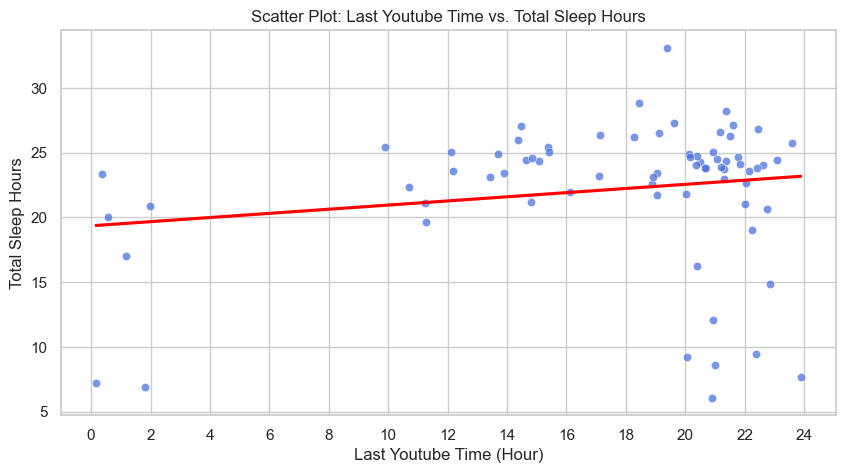

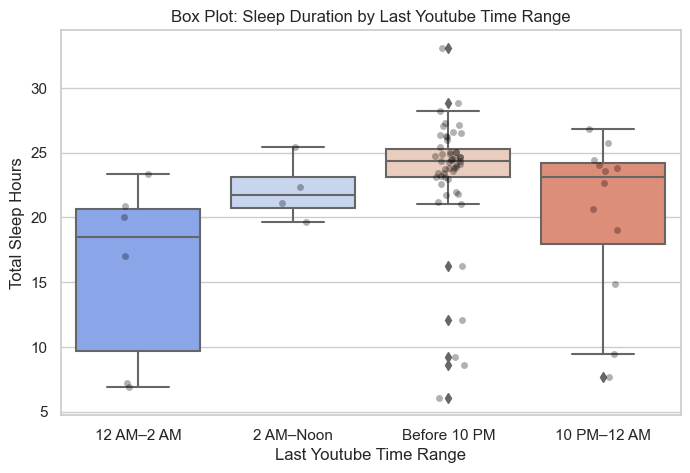

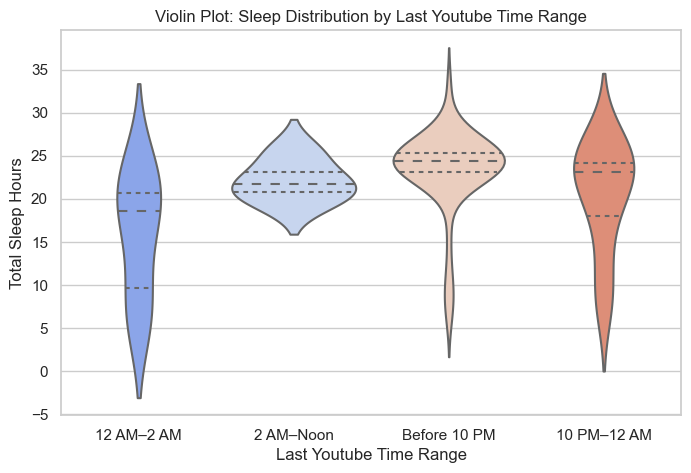

In [171]:
sns.set_theme(style="whitegrid")

print(youtube_summary_df["visit_time_first"].dtype)
youtube_summary_df["visit_date"] = pd.to_datetime(youtube_summary_df["visit_date"])


youtube_summary_df["Sleep Date"] = youtube_summary_df["visit_date"].where(
    youtube_summary_df["visit_time_last"].dt.hour < 4,  # Check if search time is before 4 AM
    youtube_summary_df["visit_date"] - pd.Timedelta(days=1)  # Subtract one day if it's after 4 AM
)

# Merge sleep and search data
youtube_merged_df = sleep_CB.merge(youtube_summary_df, left_on="Date", right_on="Sleep Date", how="left")

# Convert last search time into a numeric hour for plotting
youtube_merged_df["youtube_hour"] = pd.to_datetime(youtube_merged_df["visit_time_last"], format="%H:%M:%S").dt.hour + \
                            pd.to_datetime(youtube_merged_df["visit_time_last"], format="%H:%M:%S").dt.minute / 60

plt.figure(figsize=(10, 5))
sns.scatterplot(data=youtube_merged_df, x="youtube_hour", y="total_sleep_hours", alpha=0.7, color="royalblue")
sns.regplot(data=youtube_merged_df, x="youtube_hour", y="total_sleep_hours", scatter=False, color="red", ci=None)  # Trendline
plt.xlabel("Last Youtube Time (Hour)")
plt.ylabel("Total Sleep Hours")
plt.title("Scatter Plot: Last Youtube Time vs. Total Sleep Hours")
plt.xticks(range(0, 25, 2))  # Show time as hours
plt.show()

youtube_merged_df["youtube_range"] = pd.cut(
    youtube_merged_df["youtube_hour"],
    bins=[0, 2, 12, 22, 24],  # Before 10 PM, 10 PM–12 AM, 12 AM–2 AM, 2 AM–Noon
    labels=["12 AM–2 AM", "2 AM–Noon", "Before 10 PM", "10 PM–12 AM"],
    ordered=True
)

plt.figure(figsize=(8, 5))
sns.boxplot(data=youtube_merged_df, x="youtube_range", y="total_sleep_hours", palette="coolwarm")
sns.stripplot(data=youtube_merged_df, x="youtube_range", y="total_sleep_hours", color="black", alpha=0.3, jitter=True)  # Add individual points
plt.xlabel("Last Youtube Time Range")
plt.ylabel("Total Sleep Hours")
plt.title("Box Plot: Sleep Duration by Last Youtube Time Range")
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(data=youtube_merged_df, x="youtube_range", y="total_sleep_hours", palette="coolwarm", inner="quartile")
plt.xlabel("Last Youtube Time Range")
plt.ylabel("Total Sleep Hours")
plt.title("Violin Plot: Sleep Distribution by Last Youtube Time Range")
plt.show()


## All Inference

In [172]:
chrome_history = chrome_history_CB[["url", "title", "visit_time", "visit_date"]]
youtube_history = combined_df[["url", "title", "visit_time", "visit_date"]]
all_history = pd.concat([chrome_history, youtube_history])
print(len(all_history))
all_history.head()

33143


,url,title,visit_time,visit_date
0,https://www.google.com/search?q=lululemon+like...,lululemon like new - Google Search,2025-02-23 02:52:07,2024-11-16
1,https://www.google.com/aclk?sa=l&ai=DChcSEwilr...,lululemon Like New | Gently used gear for resale,2025-02-23 02:52:08,2024-11-16
2,https://www.googleadservices.com/pagead/aclk?s...,lululemon Like New | Gently used gear for resale,2025-02-23 02:52:08,2024-11-16
3,https://likenew.lululemon.com/?CID=Google_PPC_...,lululemon Like New | Gently used gear for resale,2025-02-23 02:52:08,2024-11-16
4,https://likenew.lululemon.com/search?q=define,"Search: 2 for ""define""",2025-02-23 02:52:18,2024-11-16


In [173]:
all_history = sort_by_date_time(all_history)
all_history.tail()

,url,title,visit_time,visit_date
33138,https://www.google.com/search?q=DB+Browser+for...,DB Browser for SQLite - Google Search,2025-02-23 00:21:43,2025-02-14
33139,https://www.google.com/search?q=DB+Browser+for...,DB Browser for SQLite - Google Search,2025-02-23 00:21:43,2025-02-14
33140,https://www.google.com/search?q=DB+Browser+for...,DB Browser for SQLite - Google Search,2025-02-23 00:21:44,2025-02-14
33141,https://sqlitebrowser.org/,DB Browser for SQLite,2025-02-23 00:21:44,2025-02-14
33142,https://sqlitebrowser.org/dl/,Downloads - DB Browser for SQLite,2025-02-23 00:21:53,2025-02-14


In [174]:
all_summary = get_first_and_last_visits(all_history)
all_summary.tail()

,visit_date,visit_time_first,url_first,title_first,visit_time_last,url_last,title_last
125,2025-02-10,2025-02-23 03:23:32,https://docs.google.com/presentation/?usp=slid...,Google Slides,2025-02-23 23:55:24,https://www.netflix.com/watch/81773841?trackId...,Netflix
126,2025-02-11,2025-02-23 02:53:29,https://docs.google.com/spreadsheets/u/1/d/e/2...,CS4774 ML Schedule - Google Drive,2025-02-23 23:49:30,https://chatgpt.com/c/67abe207-6820-800b-99fc-...,Logarithmic Expression Simplification
127,2025-02-12,2025-02-23 01:36:19,https://www.google.com/search?q=gmail&rlz=1C1O...,gmail - Google Search,2025-02-23 23:53:21,https://www.youtube.com/watch?v=6v_R180kIGs,HALF HORSE HALF MAN | OFFICIAL VIDEO - YouTube
128,2025-02-13,2025-02-23 00:49:50,https://www.google.com/search?q=problems+you+c...,problems you can solve in prolog - Google Search,2025-02-23 23:57:44,https://support.google.com/accounts/answer/302...,How to download your Google data - Google Acco...
129,2025-02-14,2025-02-23 00:13:53,https://www.google.com/search?q=hrome%3A%2F%2F...,chrome://settings/syncSetup - Google Search,2025-02-23 00:21:53,https://sqlitebrowser.org/dl/,Downloads - DB Browser for SQLite


In [100]:
keywords = ["uva", "canvas", "eqk9vb", "drive"]

tally_data = []
last_time_per_date = {}

for _, row in all_history.iterrows():
    row_tally = {"visit_date": row["visit_date"], "total_count": 0}
    
    # Count occurrences of each keyword
    for keyword in keywords:
        count = sum(row.astype(str).str.contains(keyword, case=False, na=False))
        row_tally[keyword] = count
        row_tally["total_count"] += count

    if row["visit_date"] not in last_time_per_date:
        last_time_per_date[row["visit_date"]] = row["visit_time"]
    else:
        if row["visit_time"] > last_time_per_date[row["visit_date"]]:
            last_time_per_date[row["visit_date"]] = row["visit_time"]
    
    tally_data.append(row_tally)

tally_df = pd.DataFrame(tally_data)
all_df = tally_df.groupby("visit_date", as_index=False).sum()
all_df["last_time"] = all_df["visit_date"].map(last_time_per_date)

In [101]:
all_df["visit_date"] = pd.to_datetime(all_df["visit_date"])

full_date_range = pd.date_range(start=all_df["visit_date"].min(), end=all_df["visit_date"].max(), freq="D")
missing_dates = full_date_range[~full_date_range.isin(all_df["visit_date"])]

missing_rows = []
for missing_date in missing_dates:
    missing_row = {"visit_date": missing_date, "total_count": 0, "uva": 0, "canvas": 0, "eqk9vb": 0, "drive": 0}
    missing_rows.append(missing_row)
missing_df = pd.DataFrame(missing_rows)

all_df = pd.concat([all_df, missing_df], ignore_index=True)
all_df = all_df.sort_values("visit_date").reset_index(drop=True)

all_df.head()

,visit_date,total_count,uva,canvas,eqk9vb,drive,last_time
0,2022-07-06,0,0,0,0,0,2025-02-23 21:56:16
1,2022-07-07,0,0,0,0,0,NaT
2,2022-07-08,0,0,0,0,0,NaT
3,2022-07-09,0,0,0,0,0,NaT
4,2022-07-10,0,0,0,0,0,NaT


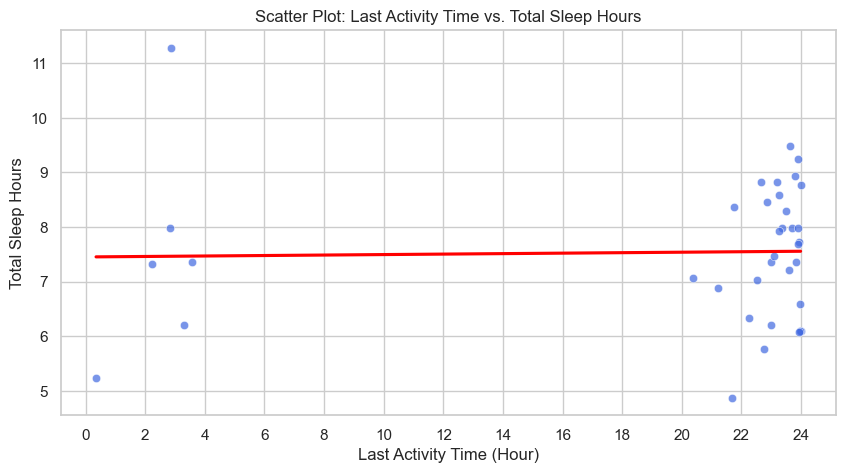

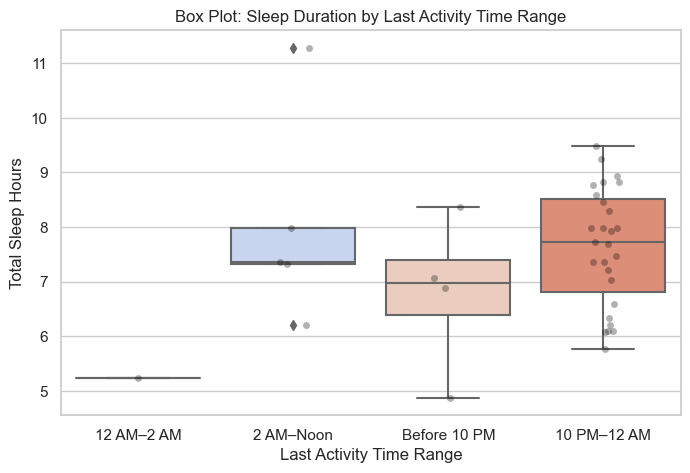

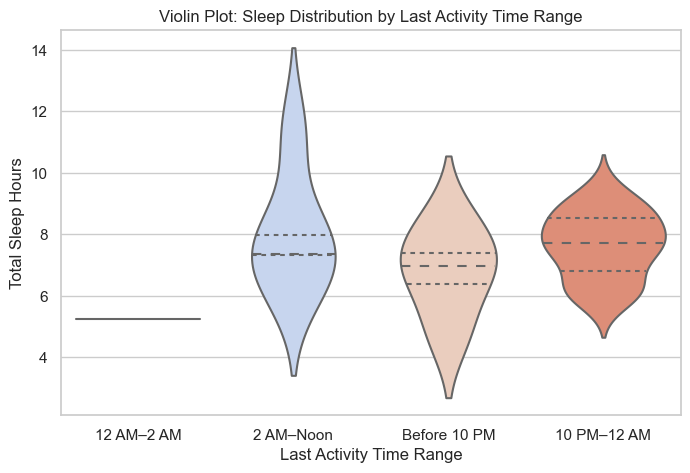

In [175]:
sns.set_theme(style="whitegrid")

all_summary["visit_date"] = pd.to_datetime(all_summary["visit_date"])

all_summary["Sleep Date"] = all_summary["visit_date"].where(
    all_summary["visit_time_last"].dt.hour < 4,  # Check if search time is before 4 AM
    all_summary["visit_date"] - pd.Timedelta(days=1)  # Subtract one day if it's after 4 AM
)

# Merge sleep and search data
all_merged_df = sleep_CB.merge(all_summary, left_on="Date", right_on="Sleep Date", how="left")

# Convert last search time into a numeric hour for plotting
all_merged_df["activity_hour"] = pd.to_datetime(all_merged_df["visit_time_last"], format="%H:%M:%S").dt.hour + \
                            pd.to_datetime(all_merged_df["visit_time_last"], format="%H:%M:%S").dt.minute / 60


all_merged_df["Date"] = pd.to_datetime(all_merged_df["Date"])

start_date = "2025-01-01"
end_date = "2025-02-17"

all_merged_df = all_merged_df[(all_merged_df["Date"] >= start_date) & (all_merged_df["Date"] <= end_date)]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=all_merged_df, x="activity_hour", y="total_sleep_hours", alpha=0.7, color="royalblue")
sns.regplot(data=all_merged_df, x="activity_hour", y="total_sleep_hours", scatter=False, color="red", ci=None)  # Trendline
plt.xlabel("Last Activity Time (Hour)")
plt.ylabel("Total Sleep Hours")
plt.title("Scatter Plot: Last Activity Time vs. Total Sleep Hours")
plt.xticks(range(0, 25, 2))  # Show time as hours
plt.show()

all_merged_df["activity_range"] = pd.cut(
    all_merged_df["activity_hour"],
    bins=[0, 2, 12, 22, 24],  # Before 10 PM, 10 PM–12 AM, 12 AM–2 AM, 2 AM–Noon
    labels=["12 AM–2 AM", "2 AM–Noon", "Before 10 PM", "10 PM–12 AM"],
    ordered=True
)

plt.figure(figsize=(8, 5))
sns.boxplot(data=all_merged_df, x="activity_range", y="total_sleep_hours", palette="coolwarm")
sns.stripplot(data=all_merged_df, x="activity_range", y="total_sleep_hours", color="black", alpha=0.3, jitter=True)  # Add individual points
plt.xlabel("Last Activity Time Range")
plt.ylabel("Total Sleep Hours")
plt.title("Box Plot: Sleep Duration by Last Activity Time Range")
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(data=all_merged_df, x="activity_range", y="total_sleep_hours", palette="coolwarm", inner="quartile")
plt.xlabel("Last Activity Time Range")
plt.ylabel("Total Sleep Hours")
plt.title("Violin Plot: Sleep Distribution by Last Activity Time Range")
plt.show()
